# Text Representation
Four main terminology in text representation:
- Corpus
- Vocabulary
- Document
- Word

## Part 1 - One Hot Encoding (OHE)
**Pros:**
- Intuitive
- Easy to implement

**Cons:**
- Sparsity
- Different shapes for different documents
- Can't represent the new word in prediction time. This problem is called *OOV (Out of Vocabulary).*
- No capturing of semantic meaning.

In [ ]:
"""
D1 = [people watch campusx]
D2 = [I watch campusx many times]

Vocabulary = [people, watch, campusx, I, many, times]
D1 = [[1, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0]]

D2 = [[0, 0, 0, 1, 0, 0],
      [0, 1, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 1]]
"""

## Part 2 - Bag of Words

| ID | Document | Label |
| :--: | :--: | :--: |
| D1 | people watch campusx | 1 |
| D2 | campusx watch campusx | 1 |
| D3 | people write comment | 0 |
| D4 | campusx write comment | 0 |

***Bags of Words* of above Data**

| people | watch | campusx | write | comment |
| :--: | :--: | :--: | :--: | :--: |
| 1 | 1 | 1 | 0 | 0 |
| 0 | 1 | 2 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 1 | 1 |

**Props:**
- Simple and intutive
- Solves the fixed size or shape problem
- Solves the Out of Vocabulary problem partially
- Can capture semantic meaning but not perfectly. Better than One Hot Encoding.

**Cons:**
- Sparsity
- Out of Vocabulary
- Orders of words are ignoring
- Two sentences "This is a very good work" and "This is not a very good work.". These two sentences are completly different and are expressing different sentiment. But because of most words are in the sentences (only exclude "not"), Bag of Words will consider them as same sentiment.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("data.csv")
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
cv = CountVectorizer()
bow = cv.fit_transform(df["text"])

In [ ]:
# vocabularies
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]


In [ ]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()

array([[2, 1, 0, 1, 1]])

## Part 3 - Bag of N-grams

| ID | Document | Label |
| :--: | :--: | :--: |
| D1 | people watch campusx | 1 |
| D2 | campusx watch campusx | 1 |
| D3 | people write comment | 0 |
| D4 | campusx write comment | 0 |

***Bag of Bi-grams* of above Data**

Vocabularies for bi-grams(V) = ["people watch", "watch campusx", "campusx watch", "people write", "write comment", "campusx write"]

V = 6

| people watch | watch campusx | campusx watch | people write | write comment | campusx write |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 1 | 1 | 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 0 |
| 0 | 0 | 0 | 0 | 1 | 1 |

***Bag of Tri-grams* of above Data**

Vocabularies for tri-grams(V) = ["people watch campusx", "campusx watch campusx", "people write comment", "campusx write comment"]

V = 4

| people watch campusx | campusx watch campusx | people write comment | campusx write comment |
| :--: | :--: | :--: | :--: |
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 |

*We can't make Quard-grams because there is no 4 word documents in our data.*

**Pros:**
- Able to capture semantic meaning of the sentence
- Intutive to understand
- Easy to implement

**Cons:**
- Uni-grams vocabularies < Bi-grams vocabularies < Tri-gram vocabularies < so on. So increases the computational cost and time complexity.
- Out of vocabulary

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))  # Bi-gram
bow = cv.fit_transform(df["text"])

In [ ]:
# vocabularies
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]


In [ ]:
cv = CountVectorizer(ngram_range=(1, 2))  # Uni-gram + Bi-gram
bow = cv.fit_transform(df["text"])
# vocabularies
print(cv.vocabulary_)

{'people': 4, 'watch': 7, 'campusx': 0, 'people watch': 5, 'watch campusx': 8, 'campusx watch': 1, 'write': 9, 'comment': 3, 'people write': 6, 'write comment': 10, 'campusx write': 2}


## Part 4 - Tf-Idf
- Tf - Term frequency
- Idf - Inverse document frequency

$$TF(t, d) = \frac{\text{Number of occurrence of term (t) in document (d)}}{\text{Total number of terms in the document (d)}}$$

$$IDF(t) = \log_e{\frac{\text{Total number of documents in the corpus}}{\text{Number of documents with term (t) in them}}}$$

| ID | Document | Label |
| :--: | :--: | :--: |
| D1 | people watch campusx | 1 |
| D2 | campusx watch campusx | 1 |
| D3 | people write comment | 0 |
| D4 | campusx write comment | 0 |

Now we are focusing to the word "people" of "D1".

$$TF(people, D1) = \frac{1}{3}$$
$$TF(campusx, D2) = \frac{2}{3}$$
$$\text{2 because the word exists 2 times in that document and 3 because there are total 3 words in that document}$$

$$IDF(campusx) = \log_e{\frac{4}{3}}$$
$$\text{4 because there are total 4 documents and 3 because the word exists in 3 documents}$$

| Vocabulaty | IDF |
| :--: | :--: |
| people | $log_e{\frac{4}{2}}$ |
| watch | $log_e{\frac{4}{2}}$ |
| campusx | $log_e{\frac{4}{3}}$ |
| write | $log_e{\frac{4}{2}}$ |
| comment | $log_e{\frac{4}{2}}$ |

$$\text{Weighted value of the word} = TF * IDF$$

**Why there is log function in IDF calculation?**

*If we take a formula like $\frac{N}{n}$ where N represents the number of total documents in the dataset and n represents the number of documents that has/have that word. Now if you have 10k documents and one word that is present only in one document, that time the idf value will be 10k. Now to calculate the weighted value of that word, have to multiply the IDF value with TF value. But because of the lagre value of IDF, it will get more piority rather than both together.*

**Props:**
- Information retrival system like search engine

**Cons:**
- Sparsity
- Out of Vocabulary
- Large dimension that can cause overfitting
- Can't capture semantic meaning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [ ]:
"""
Scikit learn library adds "1" to idf value that is calculated by our formula. The 
effect of adding "1" to the idf in the equation is that terms with zero idf i.e., 
terms that occur in all documents in a training set, will not be entierly ignored.
That's why the scikit learn calculated values and our values are different.
"""
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


## Part 5 - Custom Features | Handcrafted features
You will create features on your own like
- Number of positive words in the reviews
- Number of negative words in the reviews
- Ratio of positive & negative words
- Word counts
- Character counts

Newly created features are called **Hybrid features.**

## Part 6 - Word2Vec

**What is Embeddings?**

In natural language processing, word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.

**What is Word2Vec?**

It is a word embedding technique that converts given words to vector as in collection of numbers. This is deep learning technique.

**What are the differences with other NLP text representation techniques?**

- Semantic meaning is maintained. Two words "happy" and "joy" are similar.
- Low dimenstion vectors. That means it solves the spercity problem.
- Densed Vector. That means most of the time the word vectors are not non-zero.

### Demo

We will use the **pre-trained weights** of word2vec that was trained on **Google News** corpus containing **3 billion words**. This model consists of **300-dimensional vectors** for 3 million words and phrases.

In [ ]:
"""
DOUBTS:
1. Why there are the differences between Upper Case and Lower Case words? If we see the two vectors of 2 words "bag" and "Bag", the 2 vectors are different.
2. Why there is only one hidden layer?  
"""

In [ ]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
!pip install wget

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-12-31 15:05:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.141.248
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.141.248|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary = True)

In [ ]:
print(model['man'].shape)
model["man"]

(300,)


array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [ ]:
# get similar meaning words
model.most_similar("man")

In [ ]:
model.most_similar("cricket")

[('cricketing', 0.8372225165367126),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094818592071533),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624266147613525),
 ('Cricket', 0.7541396617889404),
 ('cricketer', 0.7372579574584961),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614782333374),
 ('West_Indies_cricket', 0.698798656463623)]

In [ ]:
# get the similarity value between two words
print(model.similarity("man", "woman"))
print(model.similarity("man", "West_Indies_cricket"))
print(model.similarity("man", "cricketing"))
print(model.similarity("man", "PHP"))

0.76640123
0.08387061
0.118040934
-0.032995153


In [ ]:
# get the odd words from set of words
print(model.doesnt_match(["PHP", "Python", "monkey"]))
print(model.doesnt_match(["PHP", "python", "monkey"]))
print(model.doesnt_match(["Python", "java", "monkey"]))
print(model.doesnt_match(["python", "java", "monkey"]))

monkey
PHP
monkey
java


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
model["Bag"] == model["bag"]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
print(model.similarity("Python", "python"))
print(model.similarity("bag", "Bag"))

0.39970425
0.45463395


In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [ ]:
vec = model["INR"] - model["India"] + model["England"]
model.most_similar([vec])

[('INR', 0.6442340612411499),
 ('GBP', 0.5040826201438904),
 ('£_##.###m', 0.4540838599205017),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.430719792842865),
 ('stg###', 0.4299262464046478),
 ('£_#.##m', 0.42561304569244385),
 ('Pounds_Sterling', 0.42512616515159607),
 ('GBP##', 0.42464494705200195)]

### Intuition

| | King | Queen | Man | Woman | Monkey |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Gender | 1 | 0 | 1 | 0 | 1 |
| Wealth | 1 | 1 | 0.3 | 0.3 | 0 |
| Power | 1 | 0.7 | 0.2 | 0.2 | 0 |
| Weight | 0.8 | 0.4 | 0.6 | 0.5 | 0.3 |
| Speak | 1 | 1 | 1 | 1 | 0 |

**Let's do an operation**

| King | - | Man | + | Woman | Result |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 1 | - | 1 | + | 0 | 0 | 
| 1 | - | 0.3 | + | 0.3 | 1 | 
| 1 | - | 0.2 | + | 0.2 | 1 | 
| 0.8 | - | 0.6 | + | 0.5 | 0.7 | 
| 1 | - | 1 | + | 1 | 1 | 

And according to our vocabulary, it is very close to the word "Queen". Our vocabulary is made with 5 words. But in real word problems, there are many many words and that is very difficult to create such features of those words for human being. This problem is solved by **Neural Networks**. But there is a downside. You have no knowledge that what features are used to create the vector.

![word2vec](https://jalammar.github.io/images/word2vec/king-colored-embedding.png)

![word2vec](https://jalammar.github.io/images/word2vec/queen-woman-girl-embeddings.png)

**The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model.**

The blog link: https://jalammar.github.io/illustrated-word2vec


### Types of Word2Vec

1. CBoW (Continuous Bag of Words)
2. Skip-Gram

#### Continuous Bag of Words (CBoW):

We have created a fake problem or dummy problem. Then we will try to solve that problem. And we will get the vector as by-product while solving the problem.

Let's assume our corpus "*watch campusx for data science*". And according to this data, we want to convert the words to vector. And also let's assume there will be 3 dimensions, e.g., the vector of word "word" can be [0.6 0.1 1.2]. Now take *3 word window*. So, "watch campusx for" is one element of the *3 word window* where "watch" and "for" these two words are *context word* and "campusx" is our "target word". According to this idea, we can create this below training data:

| X (context word) | y (target word) |
| :--: | :--: |
| watch, for | campusx |
| campusx, data | for |
| for, science | data |

Now convert the data to *one hot vector* like

| watch | campusx | for | data | science |
| :--: | :--: | :--: | :--: | :--: |
| 1 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 0 |
| 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 0 | 1 |

Now create a neural network like this:
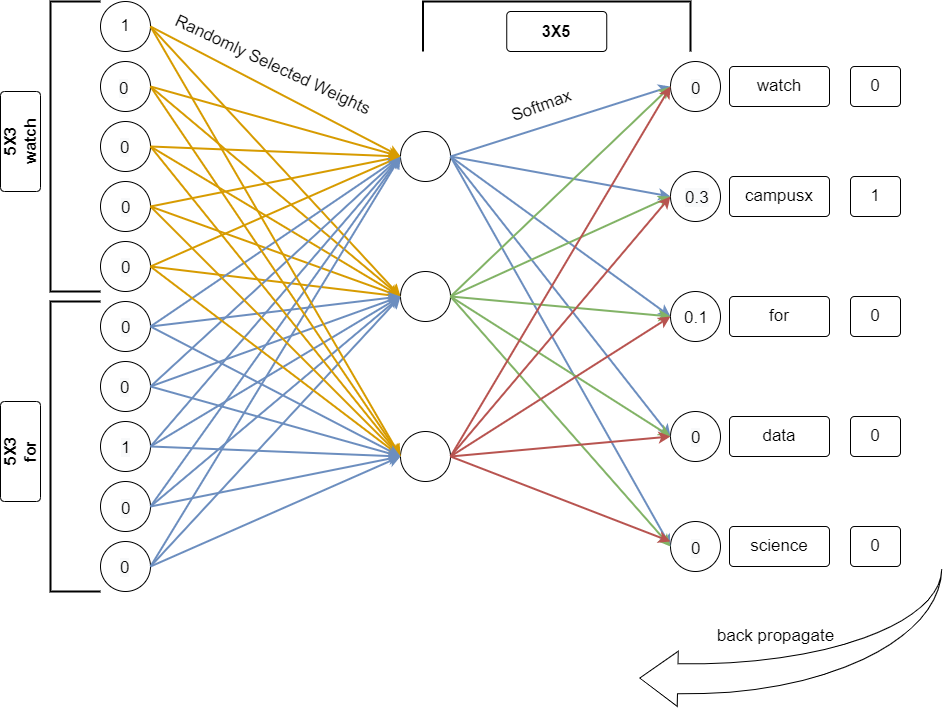

Now you will do with the other records of out dataset. But the vector form of word "watch" is comming from the weights of the hidden layer for word "watch".

#### Skip-Gram

This time also, you take a dummy problem and then reversed the it. The problem is **given target words you have to predict the context words**. So our context words of CBoW become target words and target word of CBoW becomes context word. And because of this, the neural network structure will be revered.

**When have to use CBoW and when have to use Skip-Gram?**

If you are working with small data, then you should select the CBoW because it is little faster than Skip-Gram and gives more accurate result. If you are working with large data, then go with Skip-Gram because that time it gives more accurate result than CBoW.

**The factors that helps to improve the quality of Word2Vec:**
- Increase the training data
- If you increase the dimension of vectors (that's mean have to increase the number of nodes of hidden layer).
- Increase window size but it will not help every time and it also takes more time.

### Create a Model

In [1]:
# Upload "kaggle.json" file and install kaggle library
! pip install kaggle
# Create a "kaggle" named folder
! mkdir ~/.kaggle
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json
# Download the dataset
! kaggle datasets download khulasasndh/game-of-thrones-books
# Unzip the dataset
! unzip game-of-thrones-books.zip

  0% 0.00/3.71M [00:00<?, ?B/s]
100% 3.71M/3.71M [00:00<00:00, 60.8MB/s]
Archive:  game-of-thrones-books.zip
  inflating: 001ssb.txt              
  inflating: 002ssb.txt              
  inflating: 003ssb.txt              
  inflating: 004ssb.txt              
  inflating: 005ssb.txt              


In [8]:
from gensim.utils import simple_preprocess
from nltk import sent_tokenize
import numpy as np
import pandas as pd
import gensim
import nltk
import os

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# create a folder named data and move the files inside to that folder
story = []
for filename in os.listdir('data'):
    with open(os.path.join("data", filename)) as f:
        print(f"File name: {filename}")
        corpus = f.read()
        raw_sentences = sent_tokenize(corpus)
        for sentence in raw_sentences:
            story.append(simple_preprocess(sentence))

len(story)

In [ ]:
# Define the model
model = gensim.models.Word2Vec(
    window = 10,      # 10 context words left side and 10 context words right side
    min_count = 2,    # Will take those sentences which have minimum 2 words
    workers = 4,      # cores of your processor
    vector_size = 100 # Vector size of each words
)

# Now create the vocabulary
model.build_vocab(story)

# Train the model
model.train(story, total_examples = model.corpus_count, epochs = model.epochs)

In [ ]:
model.wv.most_similar("daenerys")

In [ ]:
model.wv.doesnt_match(["jon", "rikon", "robb", "arya", "sansa", "bran"])

In [ ]:
model.wv.doesnt_match(["cersei", "jaime", "bronn", "tyrion"])

In [ ]:
model.wv["jon"]

In [ ]:
print(model.wv.similarity("arya", "sansa"))
print(model.wv.similarity("cersei", "sansa"))
print(model.wv.similarity("tywin", "sansa"))

In [ ]:
# get all words' vector form
print(model.wv.get_normed_vectors().shape)
model.wv.get_normed_vectors()

In [ ]:
# get all words
y = model.wv.index_to_key
y

In [ ]:
# reduce the 100 dimension to 3 dimension by PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

X = pca.fit_transform(model.wv.get_normed_vectors())

X[:5]

In [ ]:
# visualize the data
import plotly.express as px

fig = px.scatter_3d(data_frame = X[:500], x = 0, y = 1, z = 2, color = y[:500])
fig.show()